1.유튜브 인기동영상 데이터

In [ ]:
#데이터로드
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/youtube.csv")
df.head(4)

,Unnamed: 0,title,channelTitle,categoryId,view_count,likes,dislikes,comment_count,channelId,trending_date2
0,0,[신병] 물자창고,장삐쭈,23,1893473,38249,730,8595,UChbE5OZQ6dRHECsX0tEPEZQ,2021-01-01
1,1,RAIN(비) - 나로 바꾸자 Switch to me (duet with JYP) MV,RAIN's Official Channel,10,2600864,0,0,20129,UCxXgIeE5hxWxHG6dz9Scg2w,2021-01-01
2,2,2020년 제야의 종 온라인 타종행사 | 보신각 현장 행사는 진행하지 않습니다.,서울시 · Seoul,29,347049,3564,120,178,UCZUPZW5idAxYp-Asj__lVAA,2021-01-01
3,3,고기남자의 칠면조 파티,고기남자 MeatMan,26,528458,15372,280,3470,UCT3CumbFIJiW33uq0UI3zlg,2021-01-01


Q1.인기동영상 제작횟수가 많은 채널 상위 10개명을 출력하라 (날짜기준, 중복포함)

In [ ]:
# Top_channels = df['channelId'].value_counts().head(10).index
# Top_channels
# Ans = df[df['channelId'].isin(Top_channels)]['channelTitle'].unique().tolist()
# Ans

Top_channel2 = df['channelId'].value_counts().head(10).index
Top_channel2
Ans = df[df['channelId'].isin(Top_channel2)]['channelTitle'].unique()
Ans

array(['장삐쭈', '총몇명', '파뿌리', '짤툰', '런닝맨 - 스브스 공식 채널',
       '엠뚜루마뚜루 : MBC 공식 종합 채널', 'SPOTV', '채널 십오야', '이과장', 'BANGTANTV'],
      dtype=object)

Q2.논란으로 인기동영상이 된 케이스를 확인하고 싶다. dislikes수가 like 수보다 높은 동영상을 제작한 채널을 모두 출력하라

In [ ]:
논란채널 = (df['dislikes'] > df['likes'])
# len(df['논란횟수'] >0)

list(df.loc[논란채널].channelTitle.unique())

['핫도그TV',
 'ASMR 애정TV',
 '하얀트리HayanTree',
 '양팡 YangPang',
 '철구형 (CHULTUBE)',
 '왜냐맨하우스',
 '(MUTUBE)와꾸대장봉준',
 '오메킴TV',
 '육지담',
 'MapleStory_KR',
 'ROAD FIGHTING CHAMPIONSHIP',
 '사나이 김기훈',
 '나혼자산다 STUDIO',
 'Gen.G esports']

Q3.채널명을 바꾼 케이스가 있는지 확인하고 싶다. channelId의 경우 고유값이므로 이를 통해 채널명을 한번이라도 바꾼 채널의 갯수를 구하여라

In [ ]:
#  channelId
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/youtube.csv")
df.head(4)

change = df[['channelId','channelTitle']].drop_duplicates().channelId.value_counts()
change
target = change[change>1]
print(len(target))


71
1770


Q4.일요일에 인기있었던 영상들중 가장많은 영상 종류(categoryId)는 무엇인가?

In [ ]:
df.head(3)
df['trending_date2'] = pd.to_datetime(df['trending_date2'])
Ans = df.loc[df['trending_date2'].dt.day_name() =='Sunday'].categoryId.value_counts().index[0]

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/youtube.csv")
df.head(4)
df['trending_date2'] = pd.to_datetime(df['trending_date2'])
df['trending_date2']
df['trending_date2'] = df['trending_date2'].dt.day_name()
cond = df['trending_date2'] == 'Sunday'
df.loc[cond]['categoryId'].value_counts()

,count
categoryId,
24,3096
22,1337
10,830
17,636
23,556
25,437
26,363
20,289
1,274


Q5.각 요일별 인기 영상들의 categoryId는 각각 몇개 씩인지 하나의 데이터 프레임으로 표현하라


In [ ]:
group = df.groupby([df['trending_date2'].dt.day_name(), df['categoryId']],as_index=False).size()
#group
Ans = group.pivot(index='categoryId', columns='trending_date2')
print(Ans)

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/youtube.csv")
df

df['trending_date2'] = pd.to_datetime(df['trending_date2'])
df['trending_date2'] = df['trending_date2'].dt.day_name()
df['trending_date2']
group = df.groupby(['trending_date2','categoryId'],as_index=False).size()
group.pivot(index='categoryId', columns='trending_date2')

size                                                  
trending_date2 Friday Monday Saturday Sunday Thursday Tuesday Wednesday
categoryId                                                             
1                 243    263      255    274      246     257       234
2                 120    105      119     99      128     119       129
10                833    837      776    830      890     894       917
15                187    215      198    217      207     208       207
17                633    668      592    636      682     708       706
19                 90     92       87     91       92      89        85
20                283    298      296    289      282     285       291
22               1288   1373     1289   1337     1341    1375      1333
23                568    594      570    556      560     569       566
24               2976   3148     3066   3096     2954    3084      3090
25                444    453      422    437      470     452       468
26                369    378      364    363      375     394       385
27                183    205      183    199      194     194       212
28                171    160      173    167      166     161       165
29                 12     10       10      9       13      11        12

Q6.댓글의 수로 (comment_count) 영상 반응에 대한 판단을 할 수 있다. viewcount대비 댓글수가 가장 높은 영상을 확인하라 (view_count값이 0인 경우는 제외한다)

In [ ]:
df = df.loc[df['view_count'] != 0]
df['반응'] = df['comment_count'] / df['view_count'].dropna()
df
df.sort_values(by='반응', ascending = False).iloc[0].title

"BTS (방탄소년단) 'Butter' Official MV"

In [ ]:
df

,Unnamed: 0,title,channelTitle,categoryId,view_count,likes,dislikes,comment_count,channelId,trending_date2,반응
0,0,[신병] 물자창고,장삐쭈,23,True,38249,730,8595,UChbE5OZQ6dRHECsX0tEPEZQ,Friday,8595.0
1,1,RAIN(비) - 나로 바꾸자 Switch to me (duet with JYP) MV,RAIN's Official Channel,10,True,0,0,20129,UCxXgIeE5hxWxHG6dz9Scg2w,Friday,20129.0
2,2,2020년 제야의 종 온라인 타종행사 | 보신각 현장 행사는 진행하지 않습니다.,서울시 · Seoul,29,True,3564,120,178,UCZUPZW5idAxYp-Asj__lVAA,Friday,178.0
3,3,고기남자의 칠면조 파티,고기남자 MeatMan,26,True,15372,280,3470,UCT3CumbFIJiW33uq0UI3zlg,Friday,3470.0
4,4,골목 3mc를 분노하게 만든 마음고생이 심했을 공릉 백반집 사장님의 푸념?! [예능...,스브스밥집,24,True,3918,111,3142,UCdWgRSfttvDucq4ApcCg5Mw,Friday,3142.0
...,...,...,...,...,...,...,...,...,...,...,...
60394,60394,*풀코스로 먹습니다* 🍗치킨 + 🍕피자 + 🥧디저트,공룡,22,True,16671,209,3117,UCWf4QKgnTyvmehcRqw-JldQ,Tuesday,3117.0
60395,60395,[놀면 뭐하니? 예고] 우린 깐부잖아🦑 놀뭐에 등장한 월드클래스 초대손님!! MBC...,놀면 뭐하니?,24,True,14615,258,1141,UCx6jsZ02B4K3SECUrkgPyzg,Tuesday,1141.0
60396,60396,먹방 전쟁 : 사랑스러War (feat. 401 정육식당),김종국 GYM JONG KOOK,17,True,26490,263,1915,UCoe-0EVDJnjlSoPK8ygcGwQ,Tuesday,1915.0
60397,60397,＂너.. 광수지?＂ 협상에 거짓말부터 던지는 광수 닮은꼴 김연경 선수 [런닝맨|21...,스브스 예능맛집,24,True,14994,304,802,UCnx4Fi4cmkLGDiFfZ311wWw,Tuesday,802.0


Q7.댓글의 수로 (comment_count) 영상 반응에 대한 판단을 할 수 있다.viewcount대비 댓글수가 가장 낮은 영상을 확인하라 (view_counts, ratio값이 0인경우는 제외한다.)

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/youtube.csv")
df
df['ratio'] = df['comment_count'] / df['view_count'].dropna()
df = df.loc[(df['view_count'] !=0) & (df['ratio'] != 0)]
df.sort_values(by='ratio', ascending=True).iloc[0].title

'Join the BTS #PermissiontoDance Challenge only on YouTube #Shorts'

Q8.like 대비 dislike의 수가 가장 적은 영상은 무엇인가? (like, dislike 값이 0인경우는 제외한다)

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/youtube.csv")
df
df = df.loc[(df['likes'] != 0) & (df['dislikes'] !=0)]
df['차이영상'] =  df['dislikes'] / df['likes']


df.sort_values('차이영상', ascending = True).iloc[0].title

'[줌터뷰] *최초공개* 사부작즈🐰🐶의 비공식 이름은 아이라인즈? 꿀조합 티키타카 가득한 NCT 127 도영&정우의 줌터뷰'

Q9.가장많은 트렌드 영상을 제작한 채널의 이름은 무엇인가? (날짜기준, 중복포함)

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/youtube.csv")
df.groupby('channelTitle')['trending_date2'].value_counts()


channelTitle          trending_date2
#Like_Football 라이크풋볼  2021-01-03        1
                      2021-01-04        1
                      2021-01-05        1
                      2021-01-06        1
                      2021-01-07        1
                                       ..
힙으뜸                   2021-06-21        1
                      2021-06-22        1
                      2021-06-23        1
                      2021-06-24        1
                      2021-06-25        1
Name: count, Length: 47440, dtype: int64

Q.10 20회(20일)이상 인기동영상 리스트에 포함된 동영상의 숫자는?

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/youtube.csv")
df['trending_date2'] = pd.to_datetime(df['trending_date2'])
(df[['title','channelId']].value_counts() >= 20).sum()



np.int64(40)

###2.유튜브 공범컨텐츠 동영상 데이터

데이터 설명 : 유튜브 “공범” 컨텐츠 동영상 정보 ( 10분 간격 수집) 비디오 정보 & 참가자 채널정보

In [122]:
import pandas as pd


channel =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/channelInfo.csv')
video =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/videoInfo.csv')
display(channel.head())
display(video.head())

,channelid,subcnt,viewcnt,videocnt,ct,channelname
0,UCkQCwnkQfgSuPTTnw_Y7v7w,1310000,410238653,736,2021-09-30 03:01:03,꽈뚜룹
1,UCkQCwnkQfgSuPTTnw_Y7v7w,1310000,412531322,736,2021-09-30 09:01:03,꽈뚜룹
2,UCkQCwnkQfgSuPTTnw_Y7v7w,1310000,412531322,735,2021-09-30 15:01:03,꽈뚜룹
3,UCkQCwnkQfgSuPTTnw_Y7v7w,1310000,412531322,737,2021-09-30 21:01:03,꽈뚜룹
4,UCkQCwnkQfgSuPTTnw_Y7v7w,1320000,412531322,737,2021-10-01 03:01:04,꽈뚜룹


,videopk,viewcnt,likecnt,dislikecnt,favoritecnt,cmcnt,ct,videoname
0,c5JQp6xafqc,1667010,30474,706,0,6587,2021-10-10 15:20:03,공범 EP1
1,c5JQp6xafqc,1669089,30495,707,0,6589,2021-10-10 15:30:03,공범 EP1
2,c5JQp6xafqc,1674759,30522,711,0,6596,2021-10-10 15:40:02,공범 EP1
3,c5JQp6xafqc,1677026,30555,712,0,6604,2021-10-10 15:50:03,공범 EP1
4,c5JQp6xafqc,1681824,30585,713,0,6600,2021-10-10 16:00:03,공범 EP1


Q11. 각 데이터의 ‘ct’컬럼을 시간으로 인식할수 있게 datatype을 변경하고 video 데이터의 videoname의 각 value 마다 몇개의 데이터씩 가지고 있는지 확인하라

In [123]:
channel['ct'] = pd.to_datetime(channel['ct'])
video['ct'] = pd.to_datetime(video['ct'])
video['videoname'].value_counts()


,count
videoname,
공범 EP1,3492
공범 EP2,3204
공범 EP3,2568
공범 EP4,2280
공범 EP5,1562
공범 EP6,1274
공범 EP7,555
공범 EP8,266


Q.12 수집된 각 video의 가장 최신화 된 날짜의 viewcount값을 출력하라

In [124]:
video.sort_values(['videoname','ct'],ascending = True).drop_duplicates('videoname', keep ='last')

,videopk,viewcnt,likecnt,dislikecnt,favoritecnt,cmcnt,ct,videoname
3491,c5JQp6xafqc,3180532,41043,1113,0,7674,2021-11-01 15:30:03,공범 EP1
6695,23QQ1ru9YQg,2199328,25566,763,0,9171,2021-11-01 15:30:03,공범 EP2
9263,GygoAk1hDU0,1671294,22719,508,0,12499,2021-11-01 15:30:03,공범 EP3
11543,bK0_3Vbfvs8,1818493,22703,408,0,16949,2021-11-01 15:30:03,공범 EP4
13105,hv7FBjskAu0,1503435,19926,421,0,12434,2021-11-01 15:30:04,공범 EP5
14934,AxGKHmXyuAE,1750222,24494,389,0,13025,2021-11-01 15:30:04,공범 EP6
13660,QUjQbgj5IXM,1630200,29335,400,0,18247,2021-11-01 15:30:05,공범 EP7
15200,yZt-h-KcmUE,1289088,25616,3621,0,31663,2021-11-01 15:30:05,공범 EP8


Q13.Channel 데이터중 2021-10-03일 이후 각 채널의 처음 기록 됐던 구독자 수(subcnt)를 출력하라

In [125]:
import pandas as pd


channel =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/channelInfo.csv')
video =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/videoInfo.csv')
# display(channel.head())
# display(video.head())

channel['ct'] = pd.to_datetime(channel['ct'])
video['ct'] = pd.to_datetime(video['ct'])

# channel
channel[channel['ct'] > pd.to_datetime('2021-10-03')].sort_values(['ct', 'subcnt']).drop_duplicates('channelname')


,channelid,subcnt,viewcnt,videocnt,ct,channelname
139,UCEI4rb8YldV8v0dVUSo9ToQ,257000,28415226,73,2021-10-03 03:01:02,야전삽짱재
266,UCqwNCDzQBfw2seMRJpL-RWg,322000,71955394,212,2021-10-03 03:01:02,츄정ChuJeong
393,UCDV9zgWo7b6nPg7i49oRQ5Q,922000,99187513,82,2021-10-03 03:01:02,논리왕 전기
901,UCOYhhfLMGY8OjsbfGNVf7Lw,7520,1444890,15,2021-10-03 03:01:03,김농밀의 농밀한 삶
1028,UCKOeR5Evsupc77nPL3qCMnw,10100,188523,21,2021-10-03 03:01:03,릴펄 Lilpearl
774,UCI9W73BWje69k7f1m_I4mbQ,14900,206221,49,2021-10-03 03:01:03,형사!탐정되다
520,UClu0udsIHkalM416ttWe_Zw,55000,4681137,107,2021-10-03 03:01:03,와글와글 WagleWagle
647,UCM9Rx3EqBJ-jMhD2E8Gjb4g,215000,15902641,60,2021-10-03 03:01:03,조나단
1276,UCbBzKnCYcG7E3EIkSTdsawA,54300,7050078,54,2021-10-03 03:01:04,Balming Tiger
1155,UCs9H--14toIRdJQAD9qz9tA,471000,128772621,548,2021-10-03 03:01:04,곽토리 kwak tori


Q14.각채널의 2021-10-03 03:00:00 ~ 2021-11-01 15:00:00 까지 구독자수 (subcnt) 의 증가량을 구하여라

In [126]:
import pandas as pd
channel =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/channelInfo.csv')
video =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/videoInfo.csv')
# display(channel.head())

channel['ct'] = pd.to_datetime(channel['ct'])

start = channel.loc[channel['ct'].dt.strftime('%Y-%m-%d %H') == '2021-10-01 03']
end = channel.loc[channel['ct'].dt.strftime('%Y-%m-%d %H') == '2021-11-01 15']

start_df = start[['channelname', 'subcnt']].reset_index(drop=True)
end_df = end[['channelname', 'subcnt']].reset_index(drop=True)


start_df.columns = ['channelname', 'start_sub']
end_df.columns = ['channelname', 'end_sub']


tt = pd.merge(start_df, end_df)
print(tt)
start_df.columns = ['channelname', 'start_sub']
end_df.columns = ['channelname', 'end_sub']

tt['del'] = tt['end_sub'] - tt['start_sub']
result = tt[['channelname', 'del']]
print(result)




       channelname  start_sub  end_sub
0              꽈뚜룹    1320000  1400000
1            야전삽짱재     257000   268000
2       츄정ChuJeong     322000   323000
3           논리왕 전기     923000   911000
4  와글와글 WagleWagle      55000    55000
5              조나단     215000   227000
6          형사!탐정되다      14800    25200
7       김농밀의 농밀한 삶       7510     9060
8      릴펄 Lilpearl       9910    21100
9    곽토리 kwak tori     471000   469000
       channelname    del
0              꽈뚜룹  80000
1            야전삽짱재  11000
2       츄정ChuJeong   1000
3           논리왕 전기 -12000
4  와글와글 WagleWagle      0
5              조나단  12000
6          형사!탐정되다  10400
7       김농밀의 농밀한 삶   1550
8      릴펄 Lilpearl  11190
9    곽토리 kwak tori  -2000


In [127]:
import pandas as pd
channel =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/channelInfo.csv')
video =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/videoInfo.csv')
# display(channel.head())
# display(video.head())

# channel
channel['ct'] = pd.to_datetime(channel['ct'])
# channel['ct'].between(2021-10-03 03:00:00, 2021-11-01 15:00:00)

start = channel.loc[channel['ct'].dt.strftime('%Y-%m-%d %H') == '2021-10-03 03']
# print(start)
end = channel.loc[channel['ct'].dt.strftime('%Y-%m-%d %H') == '2021-11-01 15']
# print(end)

start_df = start[['channelname', 'subcnt']].reset_index(drop = True)
# print(start_df)
end_df = end[['channelname', 'subcnt']].reset_index(drop=True)
# print(end_df)

start_df.columns = ['channelname', 'start_sub']
end_df.columns = ['channelname', 'end_sub']

tt= pd.merge(start_df, end_df)
print(tt)
tt['del'] = tt['end_sub'] - tt['start_sub']
result = tt[['channelname', 'del']]
print(result)

# tt['del'] = tt['end_df'] - tt['start_df']
# result = tt[['channelname','subcnt']]
# print(result)

        channelname  start_sub  end_sub
0               꽈뚜룹    1330000  1400000
1             야전삽짱재     257000   268000
2        츄정ChuJeong     322000   323000
3            논리왕 전기     922000   911000
4   와글와글 WagleWagle      55000    55000
5               조나단     215000   227000
6           형사!탐정되다      14900    25200
7        김농밀의 농밀한 삶       7520     9060
8       릴펄 Lilpearl      10100    21100
9     곽토리 kwak tori     471000   469000
10    Balming Tiger      54300    56800
        channelname    del
0               꽈뚜룹  70000
1             야전삽짱재  11000
2        츄정ChuJeong   1000
3            논리왕 전기 -11000
4   와글와글 WagleWagle      0
5               조나단  12000
6           형사!탐정되다  10300
7        김농밀의 농밀한 삶   1540
8       릴펄 Lilpearl  11000
9     곽토리 kwak tori  -2000
10    Balming Tiger   2500


Q.15 각 비디오는 10분 간격으로 구독자수, 좋아요, 싫어요수, 댓글수가 수집된것으로 알려졌다. 공범 EP1의 비디오정보 데이터중 수집간격이 5분 이하, 20분이상인 데이터 구간( 해당 시점 전,후) 의 시각을 모두 출력하라

In [128]:
import pandas as pd
channel =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/channelInfo.csv')
video =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/videoInfo.csv')

channel

,channelid,subcnt,viewcnt,videocnt,ct,channelname
0,UCkQCwnkQfgSuPTTnw_Y7v7w,1310000,410238653,736,2021-09-30 03:01:03,꽈뚜룹
1,UCkQCwnkQfgSuPTTnw_Y7v7w,1310000,412531322,736,2021-09-30 09:01:03,꽈뚜룹
2,UCkQCwnkQfgSuPTTnw_Y7v7w,1310000,412531322,735,2021-09-30 15:01:03,꽈뚜룹
3,UCkQCwnkQfgSuPTTnw_Y7v7w,1310000,412531322,737,2021-09-30 21:01:03,꽈뚜룹
4,UCkQCwnkQfgSuPTTnw_Y7v7w,1320000,412531322,737,2021-10-01 03:01:04,꽈뚜룹
...,...,...,...,...,...,...
1390,UCbBzKnCYcG7E3EIkSTdsawA,56700,7528614,57,2021-10-31 15:01:04,Balming Tiger
1391,UCbBzKnCYcG7E3EIkSTdsawA,56700,7528614,57,2021-10-31 21:01:04,Balming Tiger
1392,UCbBzKnCYcG7E3EIkSTdsawA,56800,7528614,57,2021-11-01 03:01:03,Balming Tiger
1393,UCbBzKnCYcG7E3EIkSTdsawA,56800,7539876,57,2021-11-01 09:01:04,Balming Tiger


Q16.각 에피소드의 시작날짜(년-월-일)를 에피소드 이름과 묶어 데이터 프레임으로 만들고 출력하라

Q17.“공범” 컨텐츠의 경우 19:00시에 공개 되는것으로 알려져있다. 공개된 날의 21시의 viewcnt, ct, videoname 으로 구성된 데이터 프레임을 viewcnt를 내림차순으로 정렬하여 출력하라

Q18.video 정보의 가장 최근 데이터들에서 각 에피소드의 싫어요/좋아요 비율을 ratio 컬럼으로 만들고 videoname, ratio로 구성된 데이터 프레임을 ratio를 오름차순으로 정렬하라

Q19. 2021-11-01 00:00:00 ~ 15:00:00까지 각 에피소드별 viewcnt의 증가량을 데이터 프레임으로 만드시오

20. video 데이터 중에서 중복되는 데이터가 존재한다. 중복되는 각 데이터의 시간대와 videoname 을 구하여라

월드컵 출전선수 골기록 데이터

In [129]:
#데이터로드
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/worldcup/worldcupgoals.csv')
df.head()

,Player,Goals,Years,Country
0,Miroslav Klose,16,2002-2006-2010-2014,Germany
1,Ronaldo,15,1998-2002-2006,Brazil
2,Gerd Muller,14,1970-1974,Germany
3,Just Fontaine,13,1958,France
4,Pele,12,1958-1962-1966-1970,Brazil


Q21. 주어진 전체 기간의 각 나라별 골득점수 상위 5개 국가와 그 득점수를 데이터프레임형태로 출력하라

In [130]:
df.groupby('Country')['Goals'].sum().sort_values(ascending = False)
# df.sort_values('Goals', ascending = False)

,Goals
Country,
Brazil,228
Germany,226
Argentina,135
Italy,123
France,115
...,...
El Salvador,1
Iraq,1
Israel,1


Q22.
주어진 전체기간동안 골득점을 한 선수가 가장 많은 나라 상위 5개 국가와 그 선수 숫자를 데이터 프레임 형식으로 출력하라

In [131]:
# df.groupby('Player')[['Country','Goals']].sum().sort_values(ascending = False)
# df.groupby('Player')['Country']['Goals'].sum().sort_values(ascending = False)
df.groupby('Player')['Goals'].sum().sort_values(ascending=False)
df.groupby('Country')['Player'].nunique().sort_values(ascending = False)

,Player
Country,
Brazil,80
Germany,78
Italy,60
Argentina,59
France,58
...,...
El Salvador,1
Iraq,1
Haiti,1


In [132]:
result = df[df['Goals'] > 0].groupby('Country').agg(
    Num_Scorers=('Player', 'nunique'),
    Player_Names=('Player', lambda x: list(x.unique()))
).sort_values('Num_Scorers', ascending=False)


Q23.Years 컬럼은 년도 -년도 형식으로 구성되어있고, 각 년도는 4자리 숫자이다. 년도 표기가 4자리 숫자로 안된 케이스가 존재한다. 해당 건은 몇건인지 출력하라



In [133]:
df['Yearlst'] = df['Years'].str.split('-')
df['Yearlst']
def checkFour(x):
  for value in x:
    if len(str(value)) != 4:
      return False

  return True

df['check'] = df['Yearlst'].apply(checkFour)
df['check']

len(df['check'] == False)

result = len(df[df.check ==False])
result

45

Q.24
*Q23에서 발생한 예외 케이스를 제외한 데이터프레임을 df2라고 정의하고 데이터의 행의 숫자를 출력하라 (아래 문제부터는 df2로 풀이하겠습니다) *

In [134]:
df2 = df.loc[df['check'] == True].reset_index(drop=True)

Q25. 월드컵 출전횟수를 나타내는 ‘LenCup’ 컬럼을 추가하고 4회 출전한 선수의 숫자를 구하여라

In [135]:
# print(df2)
df2['LenCup'] = df['Yearlst'].str.len()
result = df2['LenCup'].value_counts()[4]
print(result)

16


Q26. Yugoslavia 국가의 월드컵 출전횟수가 2회인 선수들의 숫자를 구하여라

In [136]:
result = df2[(df2['Country'] == 'Yugoslavia') & (df2['LenCup'] == 2)]
len(result)

3

Q27. 2002년도에 출전한 전체 선수는 몇명인가?

In [137]:
df2
len(df2[df2['Years'].str.contains('2002')])

156

28.이름에 ‘carlos’ 단어가 들어가는 선수의 숫자는 몇 명인가? (대, 소문자 구분 x)

In [138]:
len(df2[df2['Player'].str.lower().str.contains('carlos')])

13

Q29. 월드컵 출전 횟수가 1회뿐인 선수들 중에서 가장 많은 득점을 올렸던 선수는 누구인가?

In [139]:
df2.loc[df2['LenCup'] ==1].sort_values('Goals',ascending=False)

,Player,Goals,Years,Country,Yearlst,check,LenCup
3,Just Fontaine,13,1958,France,[1958],True,1
6,Sandor Kocsis,11,1954,Hungary,[1954],True,1
13,Ademir,9,1950,Brazil,[1950],True,1
21,Eusebio,9,1966,Portugal,[1966],True,1
24,Guillermo Stabile,8,1930,Argentina,[1930],True,1
...,...,...,...,...,...,...,...
1236,Milos Milutinovic,1,1954-1958,Yugoslavia,"[1954, 1958]",True,1
1235,Predrag Mijatovic,1,1998,Yugoslavia,[1998],True,1
1234,Sinisa Mihajlovic,1,1998,Yugoslavia,[1998],True,1
1233,Vojislav Melic,1,1962,Yugoslavia,[1962],True,1


Q30.월드컵 출전횟수가 1회 뿐인 선수들이 가장 많은 국가는 어디인가?

In [140]:
df2.loc[df2['LenCup'] == 1].value_counts('Country')
df2[df2['LenCup'] ==1]['Country'].value_counts()


,count
Country,
Brazil,45
France,38
Italy,35
Argentina,35
Germany,31
...,...
Israel,1
Iraq,1
Panama,1


서울시 따릉이 이용정보 데이터

In [141]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/bicycle/seoul_bi.csv')
df.head()

,대여일자,대여시간,대여소번호,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-06-01,0,3541,정기권,F,~10대,1,0.00,0.00,0.00,8
1,2021-06-01,0,765,정기권,F,~10대,1,27.21,0.35,1526.81,19
2,2021-06-01,0,2637,정기권,F,~10대,1,41.40,0.37,1608.56,18
3,2021-06-01,0,2919,정기권,F,~10대,1,0.00,0.00,0.00,75
4,2021-06-01,0,549,정기권,F,~10대,1,13.04,0.17,731.55,6


Q31.대여일자별 데이터의 수를 데이터프레임으로 출력하고, 가장 많은 데이터가 있는 날짜를 출력하라

In [142]:
df['대여일자'].value_counts().index[0]

'2021-06-04'

Q32.각 일자의 요일을 표기하고 (‘Monday’ ~’Sunday’) ‘day_name’컬럼을 추가하고 이를 이용하여 각 요일별 이용 횟수의 총합을 데이터 프레임으로 출력하라

In [143]:
df['대여일자'] = pd.to_datetime(df['대여일자'])
df['day_name'] = df['대여일자'].dt.day_name()
df['day_name']

,day_name
0,Tuesday
1,Tuesday
2,Tuesday
3,Tuesday
4,Tuesday
...,...
678945,Monday
678946,Monday
678947,Monday
678948,Monday


Q33.각 요일별 가장 많이 이용한 대여소의 이용횟수와 대여소 번호를 데이터 프레임으로 출력하라

In [144]:
result = df.groupby(['day_name', '대여소번호']).size().to_frame('size').sort_values(['day_name', 'size'], ascending = False).reset_index()
result.drop_duplicates('day_name', keep='first').

SyntaxError: invalid syntax (<ipython-input-144-f1486ab7254b>, line 2)

Q34.나이대별 대여구분 코드의 (일일권/전체횟수) 비율을 구한 후 가장 높은 비율을 가지는 나이대를 확인하라. 일일권의 경우 일일권 과 일일권(비회원)을 모두 포함하라

In [ ]:
df
df['대여구분코드'].unique()
sum(df['대여구분코드'] == '일일권')
# 일일권합계 = (df['일일권'].sum) & (df['일일권(비회원)'].sum())
df
일일권들 = df['대여구분코드'].isin(['일일권', '일일권(비회원)'])
daily = df[일일권들]['연령대코드'].value_counts().sort_index()
total = df['연령대코드'].value_counts()
print(daily)
print(total)
ratio = daily / total
ratio.sort_values(ascending = False)

Q35.연령대별 평균 이동거리를 구하여라

In [ ]:
df[['연령대코드', '이동거리']].groupby('연령대코드').mean()

36.연령대 코드가 20대인 데이터를 추출하고,이동거리값이 추출한 데이터의 이동거리값의 평균 이상인 데이터를 추출한다.최종 추출된 데이터를 대여일자, 대여소 번호 순서로 내림차순 정렬 후 1행부터 200행까지의 탄소량의 평균을 소숫점 3째 자리까지 구하여라



In [ ]:
cond = df[df['연령대코드'] == '20대'].reset_index(drop=True)
cond2 = cond[cond['이동거리'] >= cond['이동거리'].mean()].reset_index(drop=True)
# print(cond2)
cond3 = cond2.sort_values(['대여일자', '대여소번호'], ascending = False).reset_index(drop=True).iloc[:200]
cond3['탄소량'] = cond3['탄소량'].astype(float)
cond4 = cond3['탄소량'].sum() / len(cond3['탄소량'])
print(round(cond4,3))

37. 6월 7일 ~10대의 “이용건수”의 중앙값은?



In [ ]:
df
# df['대여일자'] = pd.to_datetime(%m%d)
cond = df[df['대여일자'] == '2021-06-07']
cond2 = cond[cond['연령대코드'] == '~10대']
cond2['이용건수'].median()

38.평일 (월~금) 출근 시간대(오전 6,7,8시)의 대여소별 이용 횟수를 구해서 데이터 프레임 형태로 표현한 후 각 대여시간별 이용 횟수의 상위 3개 대여소와 이용횟수를 출력하라

In [ ]:
df
cond = df.loc[df['day_name'].isin(['Monday', 'Tuseday', 'Wednesday', 'Tursday','Friday'])]
cond2 = cond.loc[cond['대여시간'].isin([6,7,8])]
cond3 = cond2.groupby(['대여시간','대여소번호']).size().to_frame('이용건수')
cond3

cond3.sort_values(['대여시간','이용건수'], ascending = False).groupby('대여시간').head(3)


39.이동거리의 평균 이상의 이동거리 값을 가지는 데이터를 추출하여 추출데이터의 이동거리의 표본표준편차 값을 구하여라

In [ ]:
cond = df.loc[df['이동거리'] >= df['이동거리'].mean()]
cond['이동거리'].std()

40.남성(‘M’ or ‘m’)과 여성(‘F’ or ‘f’)의 이동거리값의 평균값을 구하여라

In [ ]:
# print(df['성별'].unique())
df['성별'] = df['성별'].replace('m','M')
df['성별'] = df['성별'].replace('f', 'F')
# print(df['성별'].unique())
cond1 = df[df['성별'] == 'M']['이동거리'].mean()
print(cond1)
cond2 = df[df['성별'] == 'F']['이동거리'].mean()
print(cond2)



전세계 행복도 지표 데이터

In [ ]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/happy2/happiness.csv',encoding='utf-8')
df.head()

41.데이터는 2018년도와 2019년도의 전세계 행복 지수를 표현한다. 각년도의 행복랭킹 10위를 차지한 나라의 행복점수의 평균을 구하여라

In [ ]:
# df.groupby('년도')
# cond1 = df.loc[df['년도'] == 2018].sort_values('점수',ascending=False).reset_index(drop=True)

# cond1.head(10)
# # cond1.head(10).iloc[9,1]
# cond1[cond1['나라명'] == 'Australia']
df[df['행복랭킹'] == 10]['점수'].mean()
df[df['나라명'] == 'Austria']['점수']
# df[df['나라명'] == 'Austrailia']['점수']

42.데이터는 2018년도와 2019년도의 전세계 행복 지수를 표현한다. 각년도의 행복랭킹 50위이내의 나라들의 각각의 행복점수 평균을 데이터프레임으로 표시하라

In [ ]:
df[df['행복랭킹'] <= 50][['년도','점수']].groupby('년도').mean()
# df

43.2018년도 데이터들만 추출하여 행복점수와 부패에 대한 인식에 대한 상관계수를 구하여라

In [ ]:
df
df[df['년도'] == 2018][['점수','부패에 대한인식']].corr().iloc[0,1]

44. 2018년도와 2019년도의 행복랭킹이 변화하지 않은 나라명의 수를 구하여라



In [ ]:


# len(df[['행복랭킹', '나라명']]) - len(df[['행복랭킹', '나라명']]).drop_duplicates()
result = len(df[['행복랭킹','나라명']]) - len(df[['행복랭킹','나라명']].drop_duplicates())
print(result)



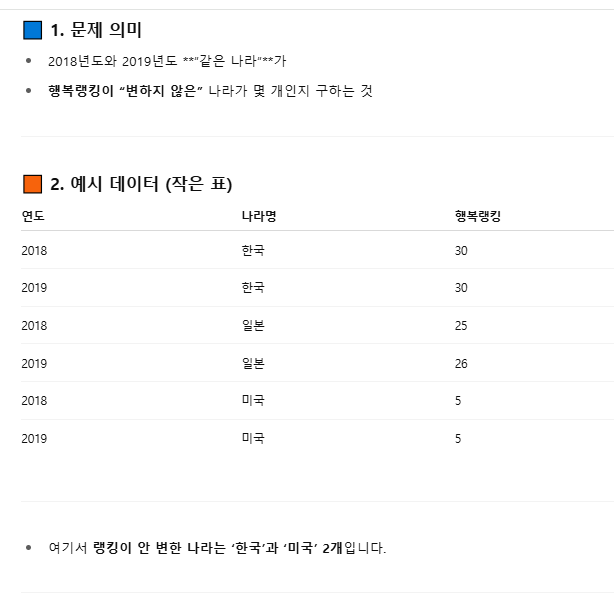

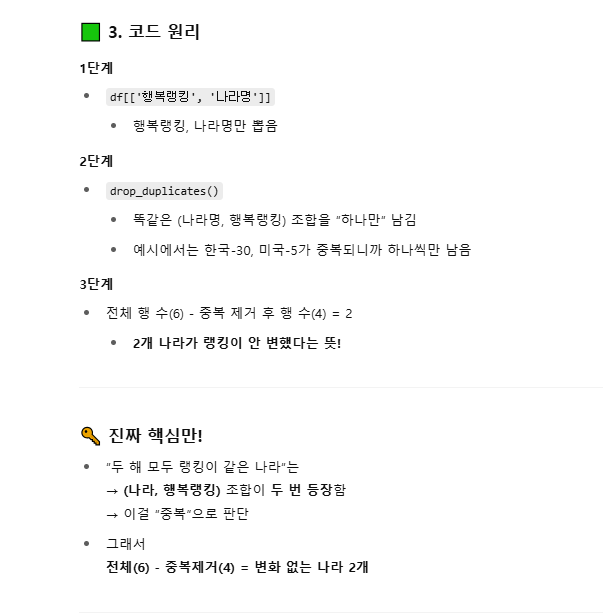

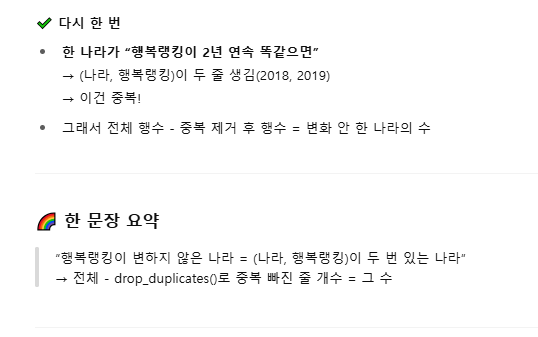

Q45.2019년도 데이터들만 추출하여 각변수간 상관계수를 구하고 내림차순으로 정렬한 후 상위 5개를 데이터 프레임으로 출력하라. 컬럼명은 v1,v2,corr으로 표시하라

In [ ]:
#상관계수는 object 컬럼은 불가
#고난도 상관관계정도만 알면 됨 패스
cond = df[df['년도'] == 2019]
cond.info()
cond2 = cond.select_dtypes(exclude='object')
cond2.corr().unstack().to_frame().reset_index().dropna()

Q46.각 년도별 하위 행복점수의 하위 5개 국가의 평균 행복점수를 구하여라



In [ ]:
cond = df.groupby('년도').tail(5)
cond.groupby('년도')['점수'].mean()

Q47.2019년 데이터를 추출하고 해당데이터의 상대 GDP 평균 이상의 나라들과 평균 이하의 나라들의 행복점수 평균을 각각 구하고 그 차이값을 출력하라

In [ ]:
cond = df[df['년도'] == 2019]
GDP = cond['상대GDP'].mean()

upper = cond[cond['상대GDP'] >= GDP]
lower = cond[cond['상대GDP'] <= GDP]

# print(upper)

result1 = upper['점수'].mean()
result2 = lower['점수'].mean()
print(result1)
print(result2)
print(result1 - result2)

In [ ]:
#이건 데이터 마님 풀이가 틀림 이유는 2019년 데이터를 추출안하고 했을 때 이렇게 나오는것임!
#문제는 2019년 데이터 추출하고 하라했으니 이건 잘못됨
over = df[df.상대GDP >= df.상대GDP.mean()]['점수'].mean()
under = df[df.상대GDP <= df.상대GDP.mean()]['점수'].mean()
print(over)
print(under)

result= over - under
print(result)

Q48.각년도의 부패에 대한인식을 내림차순 정렬했을때 상위 20개 국가의 부패에 대한인식의 평균을 구하여라



In [ ]:
cond = df.sort_values(['년도','부패에 대한인식'],ascending = False)
cond1 = cond.groupby('년도').head(20)
cond1.groupby('년도')['부패에 대한인식'].mean()

Q49.2018년도 행복랭킹 50위 이내에 포함됐다가 2019년 50위 밖으로 밀려난 국가의 숫자를 구하여라

In [ ]:
#set은 중복없는 값들의 모임으로 중복이 있으면 안되니까 set으로 묶어줘서 뺴주는것
#set의 역할은 나라이름 중복을 자동으로 제거하고 & 집합연산(차집합)을 이용해서 빠진나라를 뽑을 수 있게 하는것임

cond1 = set(df[(df['년도'] == 2018) & (df['행복랭킹'] <= 50)]['나라명'])
cond2 = set(df[(df['년도'] == 2019) & (df['행복랭킹'] <= 50)]['나라명'])
print(len(cond1 - cond2))

In [ ]:
#위 처럼 set을 안쓰면 이렇게 수치가 달라져 버림
cond1 = df[(df['년도'] == 2018) & (df['행복랭킹'] <= 50)]['나라명']
cond2 = df[(df['년도'] == 2019) & (df['행복랭킹'] <= 50)]['나라명']
print(len(cond1 - cond2))

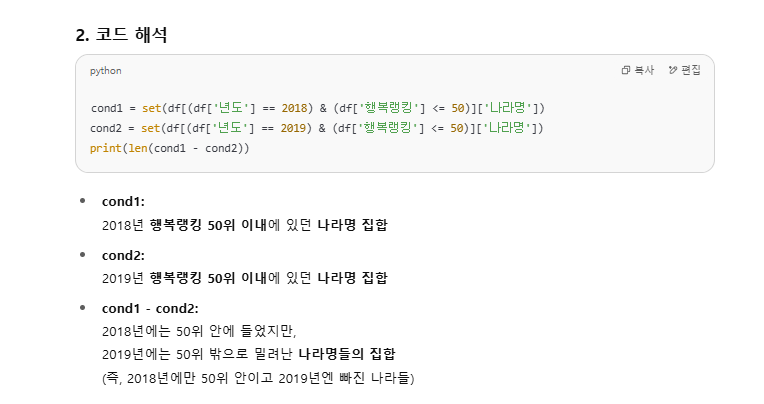

Q.50 2018년,2019년 모두 기록이 있는 나라들 중 년도별 행복점수가 가장 증가한 나라와 그 증가 수치는?

In [ ]:
count = df['나라명'].value_counts()
target = count[count>=2].index

cond = df[df['나라명'].isin(target)].reset_index(drop=True)
cond
cond.loc[cond['년도'] ==2018, '점수'] = cond[cond['년도'] ==2018]['점수'].values*(-1)
result = cond.groupby('나라명').sum()['점수'].sort_values().to_frame().iloc[-1]
result

지역구 에너지 소비량 데이터

In [ ]:
import pandas as pd
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/consum/Tetuan%20City%20power%20consumption.csv')
df.head()

Q51.DateTime컬럼을 통해 각 월별로 몇개의 데이터가 있는지 데이터 프레임으로 구하여라

In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
result =df['DateTime'].dt.month.value_counts().sort_index().to_frame()
result




Q52. 3월달의 각 시간대별 온도의 평균들 중 가장 낮은 시간대의 온도를 출력하라



In [ ]:
march = df[(df['DateTime'].dt.month == 3)]
result = march.groupby(march['DateTime'].dt.hour)['Temperature'].mean().min()
result

Q53. 3월달의 각 시간대별 온도의 평균들 중 가장 높은 시간대의 온도를 출력하라

In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df
cond = df[df['DateTime'].dt.month ==3]
cond.groupby(cond['DateTime'].dt.hour)['Temperature'].mean().sort_values(ascending = False)

Q54.Zone 1 Power Consumption 컬럼의 value값의 크기가 Zone 2 Power Consumption 컬럼의 value값의 크기보다 큰 데이터들의 Humidity의 평균을 구하여라

In [ ]:
cond = df[df['Zone 1 Power Consumption'] > df['Zone 2  Power Consumption']]
cond['Humidity'].mean()
# df.columns

  Q55.각 zone의 에너지 소비량의 상관관계를 구해서 데이터 프레임으로 표기하라

In [ ]:
df[['Zone 1 Power Consumption','Zone 2  Power Consumption','Zone 3  Power Consumption']].corr()

#두번쨰방법
df.iloc[:,-3:].corr()


Q56.Temperature의 값이 10미만의 경우 A, 10이상 20미만의 경우 B,20이상 30미만의 경우 C, 그 외의 경우 D라고 할때 각 단계의 데이터 숫자를 구하여라

In [ ]:
#1번풀이
A = df[df['Temperature'] < 10]
B = df[(df['Temperature'] >= 10) & (df['Temperature'] < 20)]
C = df[(df['Temperature'] >= 20) & (df['Temperature'] < 30)]
D = df[df['Temperature'] <= 30]

print(len(A))
print(len(B))
print(len(C))
print(len(D))


#2번풀이
def split_data(x):
  if x<10:
    return "A"
  elif x<20:
    return "B"
  elif x<30:
    return "C"
  else:
    return "D"
df['sp'] = df['Temperature'].map(split_data)
result = df['sp'].value_counts()
result


Q57.6월 데이터중 12시의 Temperature의 표준편차를 구하여라

In [ ]:
cond = df[df['DateTime'].dt.month ==6]
cond[cond['DateTime'].dt.hour == 12]['Temperature'].std()

Q58.6월 데이터중 12시의 Temperature의 분산을 구하여라

In [ ]:
cond = df[df['DateTime'].dt.month ==6]
cond[cond['DateTime'].dt.hour ==12]['Temperature'].var()

Q59.Temperature의 평균이상의 Temperature의 값을 가지는 데이터를 Temperature를 기준으로 정렬 했을때 4번째 행의 Humidity 값은?

In [ ]:
cond = df[df['Temperature'] >= df['Temperature'].mean()]
cond.sort_values('Temperature')['Humidity'].values[3]
# cond.sort_values('Temperature')['Humidity']

Q60.**Temperature의 중간값 이상의 Temperature의 값을 가지는 데이터를Temperature를 기준으로 정렬 했을때 4번째 행의 Humidity 값은?

In [ ]:
cond = df[df['Temperature'] >= df['Temperature'].median()]
cond.sort_values('Temperature')['Humidity'].values[3]

포켓몬 정보 데이터

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/pok/Pokemon.csv')
df.head()

Q61.Legendary 컬럼은 전설포켓몬 유무를 나타낸다.전설포켓몬과 그렇지 않은 포켓몬들의 HP평균의 차이를 구하여라

In [ ]:
df
result = (df[(df['Legendary'] == True)]['HP'].mean()) -  (df[(df['Legendary'] == False)]['HP'].mean())
result

Q62. Type 1은 주속성 Type 2 는 부속성을 나타낸다. 가장 많은 부속성 종류는 무엇인가?



In [ ]:
df['Type 2'].value_counts().index[0]


Q63.가장 많은 Type 1 의 종의 평균 Attack 을 평균 Defense로 나눈값은?

In [ ]:
cond = df['Type 1'].value_counts().index[0]
cond
cond1 = df[df['Type 1'] == cond]
cond2 = cond1['Attack'].mean() / cond1['Defense'].mean()
cond2



Q64.포켓몬 세대(Generation) 중 가장많은 Legendary를 보유한 세대는 몇세대인가?

In [ ]:
df[df['Legendary'] ==True]['Generation'].value_counts().idxmax()

Q65.‘HP’, ‘Attack’, ‘Defense’, ‘Sp. Atk’, ‘Sp. Def’, ‘Speed’ 간의 상관 계수중 가장 절댓값이 큰 두 변수와 그 값을 구하여라


In [ ]:
target = df[['HP', 'Defense', 'Sp. Atk', 'Sp. Def','Speed']].corr().unstack().reset_index().rename(columns={0: "corr"})
result

In [ ]:
 df[['HP', 'Defense', 'Sp. Atk', 'Sp. Def','Speed']].corr()


Q.66 각 Generation의 Attack으로 오름차순 정렬시 상위 3개 데이터들(18개)의 Attack의 전체 평균을 구하여라



In [ ]:
cond = df.sort_values(['Generation', 'Attack']).groupby('Generation').head(3)
cond['Attack'].mean()

Q.67 각 Generation의 Attack으로 내림차순 정렬시 상위 5개 데이터들(30개)의 Attack의 전체 평균을 구하여라



In [ ]:
cond = df.sort_values(['Generation', 'Attack'],ascending=False).groupby('Generation').head(5)
cond['Attack'].mean()

Q68.가장 흔하게 발견되는 (Type1 , Type2) 의 쌍은 무엇인가?

In [ ]:
df[['Type 1','Type 2']].value_counts().head(1)

Q69.한번씩만 존재하는 (Type1 , Type2)의 쌍의 갯수는 몇개인가?

In [ ]:
cond = df[['Type 1','Type 2']].value_counts()
len(cond[cond==1])

Q70. 한번씩만 존재하는 (Type1 , Type2)의 쌍을 각 세대(Generation)은 각각 몇개씩 가지고 있는가?

In [ ]:
#데이터 마님 풀이보다 이게 더 쉬움 이걸로 ㄱㄱ
cond = df[['Type 1', 'Type 2', 'Generation']].value_counts()
cond
vc = cond[cond == 1]  # 한 번만 나오는 쌍만 남김
vc
result = vc.reset_index().groupby('Generation').size()
result

대한민국 체력장 데이터

In [ ]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/body/body.csv')
df.head()

Q71. 전체데이터의 수축기혈압(최고) - 이완기혈압(최저)의 평균을 구하여라

In [ ]:
cond = (df['수축기혈압(최고) : mmHg']) - (df['이완기혈압(최저) : mmHg'])
cond.mean()

Q72.50~59세의 신장평균을 구하여라

In [ ]:
cond = df[(df['측정나이'] >= 50)  & (df['측정나이'] <=59)]
cond['신장 : cm'].mean()

Q73.연령대 (20~29 : 20대 …) 별 인원수를 구하여라



In [ ]:
#2가지 방법

#1번방법 -> simple
df['연령대'] = df['측정나이'] //10 *10
df['연령대'].value_counts()

# #2번방법
# def generation(x):
#     if x <= 29:
#         return 20
#     elif x <= 39:
#         return 30
#     elif x <= 49:
#         return 40
#     elif x <= 59:
#         return 50
#     else:
#         return 60

# df['연령대'] = df['측정나이'].apply(generation)
# print(df['연령대'].value_counts().sort_index())


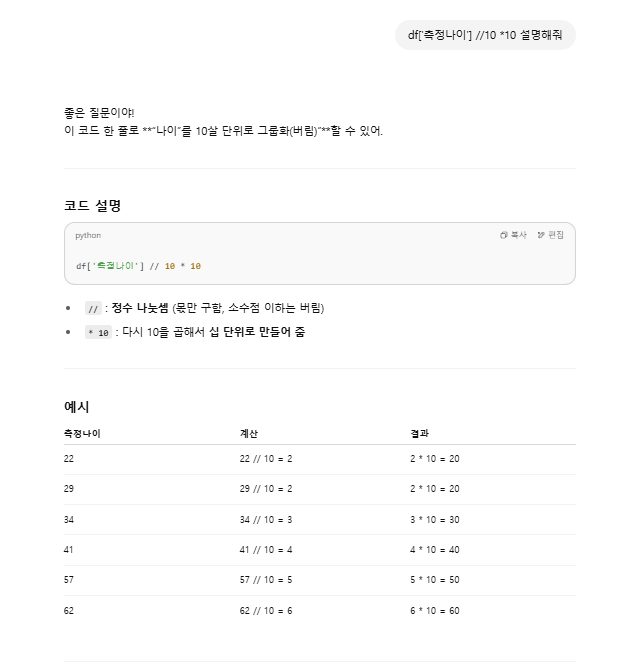

Q74.연령대 (20~29 : 20대 …) 별 등급의 숫자를 데이터 프레임으로 표현하라


In [ ]:
#둘다 풀림
#1번방법
df['연령대'] = df['측정나이'] //10 * 10
df.groupby('연령대')['등급'].value_counts()

#2번방법
# df['연령대'] = df['측정나이'] //10 * 10
# df.groupby(['연령대', '등급']).size()

Q75.남성 중 A등급과 D등급의 체지방률 평균의 차이(큰 값에서 작은 값의 차)를 구하여라

In [ ]:
cond = df[df['측정회원성별'] == 'M']
Aman = cond[cond['등급'] == 'A']
A_result = Aman['체지방율 : %'].mean()
A_result
Dman = cond[cond['등급'] == 'D']
D_result = Dman['체지방율 : %'].mean()

print((abs(A_result - D_result)))

Q.76 여성 중 A등급과 D등급의 체중의 평균의 차이(큰 값에서 작은 값의 차)를 구하여라



In [ ]:
cond = df[df['측정회원성별'] == 'F']
Agirl = cond[cond['등급'] == 'A']
result1 = Agirl['체중 : kg'].mean()
Dgirl = cond[cond['등급'] == 'D']
result2 = Dgirl['체중 : kg'].mean()

print(abs(result1 - result2))


Q77.bmi는 자신의 몸무게(kg)를 키의 제곱(m)으로 나눈값이다. 데이터의 bmi 를 구한 새로운 컬럼을 만들고 남성의 bmi 평균을 구하여라

In [ ]:
df
df['bmi'] = df['체중 : kg'] / (df['신장 : cm']/100)**2
cond = df[df['측정회원성별'] =='M']['bmi'].mean()
cond
# cond['bmi'].mean()

Q78.bmi보다 체지방율이 높은 사람들의 체중평균을 구하여라


In [ ]:
df
df[df['bmi'] < df['체지방율 : %']]['체중 : kg'].mean()

Q79.남성과 여성의 악력 평균의 차이를 구하여라

In [ ]:
df[df['측정회원성별'] == 'M']['악력D : kg'].mean() -  df[df['측정회원성별'] == 'F']['악력D : kg'].mean()


Q80.남성과 여성의 교차윗몸일으키기 횟수의 평균의 차이를 구하여라

In [ ]:
cond = df.groupby('측정회원성별')['교차윗몸일으키기 : 회'].mean()
cond['M'] - cond['F']

기온 강수량 데이터

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/weather/weather2.csv")
df.head()

Q81.여름철(6월,7월,8월) 이화동이 수영동보다 높은 기온을 가진 시간대는 몇개인가?

In [ ]:
df['time'] = pd.to_datetime(df['time'])
여름철 = df[df['time'].dt.month.isin([6,7,8])].reset_index(drop=True)
여름철
cond = 여름철['이화동기온'] > 여름철['수영동기온']
cond.sum()
#len을 하면 Flase의 개수도 세서 전체 행의 개수이므로 틀림
#sum을 해야 True의 개수를 합해서 정답이 나옴

Q82.이화동과 수영동의 최대강수량의 시간대를 각각 구하여라



In [ ]:
#이렇게 해도됨 꼭 데이터 마님처럼 할 필요 없음
print(df.sort_values('이화동강수',ascending=False).iloc[0,0])
print(df.sort_values('수영동강수',ascending =False).iloc[0,0])

In [ ]:
df[['이화동강수','time']].max()

서비스 이탈예측 데이터

In [ ]:
import pandas as pd
#데이터 로드
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/churn/train.csv")
df.head()

Q83.남성 이탈(Exited)이 가장 많은 국가(Geography)는 어디이고 이탈 인원은 몇명인가?

In [ ]:
cond = df[df['Gender'] == 'Male']
df
cond.groupby('Geography')['Exited'].sum().sort_values(ascending=False)

Q84.**카드를 소유(HasCrCard ==1)하고 있으면서 활성멤버(IsActiveMember ==1) 인 고객들의 평균 나이를 소숫점이하 4자리까지 구하여라? **

In [ ]:
cond = df[(df['HasCrCard'] ==1) & df['IsActiveMember'] == 1]
result = cond['Age'].mean()
print(round(result,4))

Q85.Balance 값이 중간값 이상을 가지는 고객들의 CreditScore의 표준편차를 소숫점이하 3자리까지 구하여라

In [ ]:
cond = df[df['Balance'] >= df['Balance'].median()]
result = cond['CreditScore'].std()
print(round(result,3))

성인 건강검진 데이터

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/smoke/train.csv")
df.head()

In [ ]:
Q86.수축기혈압과 이완기 혈압기 수치의 차이를 새로운 컬럼(‘혈압차’) 으로 생성하고, 연령대 코드별 각 그룹 중 ‘혈압차’ 의 분산이 5번째로 큰 연령대 코드를 구하여라

In [ ]:
df['혈압차'] = df['수축기혈압'] - df['이완기혈압']
df['혈압차'].var()
df.groupby('연령대코드(5세단위)')['혈압차'].var().sort_values(ascending=False).head(5)

Q87.비만도를 나타내는 지표인 WHtR는 허리둘레 / 키로 표현한다. 일반적으로 0.58이상이면 비만으로 분류한다. 데이터중 WHtR 지표상 비만인 인원의 남/여 비율을 구하여라

In [ ]:
#풀이 1
df['WHtR'] = df['허리둘레'] / df['신장(5Cm단위)']
비만 = df[df['WHtR'] >= 0.58]

남비만 = 비만[비만['성별코드'] == 'M']
여비만 = 비만[비만['성별코드'] == 'F']

len(남비만) / len(여비만)

In [ ]:
#풀이2
df['비만'] = df['허리둘레'] / df['신장(5Cm단위)']
data = df.loc[df['비만'] >= 0.58]['성별코드'].value_counts()
answer = data['M'] / data['F']
answer

자동차 보험가입 예측데이터

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/insurance/train.csv")
df.head()

Q88.Vehicle_Age 값이 2년 이상인 사람들만 필터링 하고 그중에서
Annual_Premium 값이 전체 데이터의 중간값 이상인 사람들을 찾고, 그들의 Vintage값의 평균을 구하여라

In [ ]:
cond = df[df['Vehicle_Age'] == '> 2 Years']
cond2 = cond[cond['Annual_Premium'] >= cond['Annual_Premium'].median()]
cond2['Vintage'].mean()

Q89.vehicle_age에 따른 각 성별(gender)그룹의 Annual_Premium값의 평균을 구하여 아래 테이블과 동일하게 구현하라

In [ ]:
cond = df.groupby(['Vehicle_Age', 'Gender'],as_index = False)['Annual_Premium'].mean()
cond
cond.pivot(index='Vehicle_Age', columns = 'Gender', values='Annual_Premium')

핸드폰 가격 예측데이터

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/mobile/train.csv")
df.head()

Q90.price_range 의 각 value를 그룹핑하여 각 그룹의 n_cores 의 빈도가 가장높은 value와 그 빈도수를 구하여라

In [ ]:
df.groupby('price_range')['n_cores'].value_counts().reset_index().groupby('price_range').head(1)

Q91.price_range 값이 3인 그룹에서 상관관계가 2번째로 높은 두 컬럼과 그 상관계수를 구하여라



In [ ]:
cond = df[df['price_range']== 3].corr().unstack().sort_values(ascending=False)
cond[cond!=1].reset_index()

cond = df[df['price_range']==3].corr().unstack().sort_values(ascenindg=False)
cond[cond!=1].reset_index()

비행탑승 경험 만족도 데이터

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/train.csv")
df.head()

Q92.Arrival Delay in Minutes 컬럼이 결측치인 데이터들 중 ‘neutral or dissatisfied’ 보다 ‘satisfied’의 수가 더 높은 Class는 어디 인가?

In [ ]:
cond = df[df['Arrival Delay in Minutes'].isnull()]
# cond.isnull().sum()
# cond.shape
cond2 = cond.groupby(['Class', 'satisfaction'],as_index = False).size().pivot(index ='Class', columns = 'satisfaction')
cond2
result= cond2[cond2['size']['neutral or dissatisfied'] < cond2['size']['satisfied']]
result

#이건 피벗을 해줘야 하는 문제임 내 방식대로 풀면 안된다고함

수질 음용성 여부 데이터

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/waters/train.csv")
df.head()

In [ ]:
target = df['ph'].dropna()
answer =target.loc[target <= target.quantile(0.25)].mean()
print(answer)

Q93.ph값은 상당히 많은 결측치를 포함한다. 결측치를 제외한 나머지 데이터들 중 사분위값 기준 하위 25%의 값들의 평균값은?
(ph칼럼에 국한되어 낸문제임 답보니까) 문제를 모호하게냄
ph칼럼에 결측치를 제외한 데이터중 사분위값 기준 25%의 하위값들의 평균값은? 이렇게 냈어야함


In [ ]:
target = df['ph'].dropna()
answer =target[target <= target.quantile(0.25)].mean()
answer


의료 비용 예측 데이터

In [ ]:
import pandas as pd
train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/MedicalCost/train.csv")
train.head()

Q94.흡연자와 비흡연자 각각 charges의 상위 10% 그룹의 평균의 차이는?

In [ ]:
cond = train[train['smoker'] == 'yes']
cond2 = train[train['smoker'] == 'no']
result = cond['charges'].sort_values(ascending = False).iloc[:21]
result2 = cond2['charges'].sort_values(ascending = False).iloc[:86]

print(result.mean() - result2.mean())
# print(cond.shape)
# print(cond2.shape)
# print(860*0.1)

킹카운티 주거지 가격예측문제 데이터

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/kingcountyprice//train.csv")
df.head()

Q95.bedrooms 의 빈도가 가장 높은 값을 가지는 데이터들의 price의 상위 10%와 하위 10%값의 차이를 구하여라

In [ ]:
df['bedrooms'].value_counts()

cond = df[df['bedrooms'] == 3]
cond = cond.sort_values(by='bedrooms',ascending =False)
result1 = cond['price'].quantile(0.1)
result2 = cond['price'].quantile(0.9)

result2 - result1

대학원 입학가능성 데이터

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/admission/train.csv")
df.head()

Q.96 Serial No. 컬럼을 제외하고 ‘Chance of Admit’을 종속변수, 나머지 변수를 독립변수라 할때, 랜덤포레스트를 통해 회귀 예측을 할 떄 변수중요도 값을 출력하라 (시드값에 따라 순서는 달라질수 있음)



In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/admission/train.csv")
# 1. 준비
df = df.drop('Serial No.',axis=1)
y = df.pop('Chance of Admit')
x = df

# 2. 모델 학습
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=35)
model.fit(x,y)

#3. 변수중요도
import pandas as pd
importance = pd.Series(model.feature_importances_, index=x.columns)
importance.sort_values(ascending = False)

레드 와인 퀄리티 예측 데이터

Q97.quality 값이 3인 그룹과 8인 데이터그룹의 각 컬럼별 독립변수의 표준편차 값의 차이를 구할때 그값이 가장 큰 컬럼명을 구하여라

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/redwine/train.csv")
df.head()

In [ ]:
cond1 = df[df['quality'] == 3].std()
cond2 = df[df['quality'] == 8].std()

result = cond2 - cond1
result.sort_values(ascending=False)



# df['차이값'] = cond1 - cond2
# df.sort_values('차이값', ascending = False)

약물 분류 데이터

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/drug/train.csv")
df.head()

Q98.남성들의 연령대별 (10살씩 구분 0~9세 10~19세 …) Na_to_K값의 평균값을 구해서 데이터 프레임으로 표현하여라

In [ ]:
cond = df[df['Sex'] =='M']
cond['Age']= cond['Age'] //10 *10
cond.groupby('Age')['Na_to_K'].mean().to_frame()

사기회사 분류 데이터

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/audit/train.csv")
df.head()

Q99.데이터의 Risk 값에 따른 score_a와 score_b의 평균값을 구하여라

In [ ]:
df.groupby('Risk')[['Score_A', 'Score_B']].mean()

센서데이터 동작유형 분류 데이터

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/muscle/train.csv")
df.head()

Q100. pose값에 따른 각 motion컬럼의 중간값의 가장 큰 차이를 보이는 motion컬럼은 어디이며 그값은?

In [ ]:
cond = df.groupby('pose').median().transpose()
cond['차이'] = abs(cond[0] - cond[1])
cond.sort_values('차이', ascending=False).reset_index()

현대 차량 가격 분류문제 데이터

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/hyundai/train.csv")
df.head()

Q101.정보(row수)가 가장 많은 상위 3차종의 price값의 각 평균값은?



In [ ]:
df['model'].unique()
df.value_counts()
A = df[df['model'] == ' Tucson']['price'].mean()
B = df[df['model'] == ' I10']['price'].mean()
C = df[df['model'] == ' I30']['price'].mean()

print(A)
print(B)
print(C)

In [ ]:
#다른풀이
cond = df['model'].value_counts().index[:3]
cond2 = df[df['model'].isin(cond)]
cond2.groupby('model')['price'].mean()

당뇨여부판단 데이터

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/diabetes/train.csv")
df.head()

Q102.Outcome 값에 따른 각 그룹의 각 컬럼의 평균 차이를 구하여라



In [ ]:
# cond = df.groupby('Outcome').mean().T.reset_index()
cond
cond['차이'] = abs(cond[0] - cond[1])
cond

In [ ]:
#다른풀이
answer = df.groupby('Outcome').mean().diff().iloc[1,:]
print(answer)

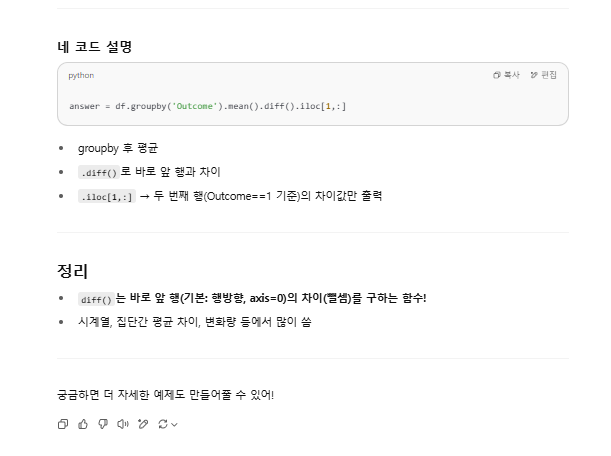

넷플릭스 주식 데이터

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/nflx/NFLX.csv")
df.head()

Q103.매년 5월달의 open가격의 평균값을 데이터 프레임으로 표현하라

In [ ]:
import pandas as pd
#datetime 형태로 바꿔주고
df['Date'] = pd.to_datetime(df['Date'])
#stfr함수써서 년-월로 바꿔주고
df['Date'] = df['Date'].dt.strftime('%Y-%m')
#년월로 바뀐 Date로 그룹으로 묶어서 평균내주고
cond = df.groupby('Date').mean()
#index에 -05월이 들어간 str만 뽑아서 (이미평균이나와있는)Open을 불러온다
cond[cond.index.str.contains('-05')]['Open']
# cond[cond['Date'].dt.month==5]



nba 선수 능력치 데이터

In [147]:
pd.set_option('display.max_columns',50)
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/nba/nba.csv",encoding='latin',sep=';')
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,0.439,0.8,2.1,0.359,2.9,6.1,0.468,0.486,1.1,1.8,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,0.0,0.0,0.000,2.8,5.0,0.548,0.547,1.4,2.6,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,0.0,0.1,0.000,7.3,12.9,0.562,0.557,4.6,6.1,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,0.2,1.5,0.125,1.5,2.6,0.560,0.424,0.6,1.0,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.550,0.3,1.0,0.304,5.1,8.8,0.578,0.566,1.9,2.2,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


Q104.Tm 컬럼은 각 팀의 이름을 의미한다. TOR팀의 평균나이를 소수 4째 자리까지 구하여라



In [153]:
# df['Tm']
# df.groupby
# df[df['Tm'] == 'TOR']

cond = df[df['Tm'] == 'TOR']

round(cond['Age'].mean(),4)


np.float64(24.8696)

Q105.Pos 컬럼은 포지션을 의미한다. 전체 선수 중 최소나이대의 선수들을 필터하고 그들 중 가장 많은 포지션은 무엇인지 확인하라

In [162]:
cond = df['Age'].sort_values().min()
df[df['Age'] == cond]['Pos'].value_counts()

,count
Pos,
SG,9
PF,2
SF,1
C,1


Q106.선수들의 이름은 first_name+ 공백 + last_name으로 이루어져 있다. 가장 많은 first_name은 무엇이며 몇 회 발생하는지 확인하라

In [169]:
# df['Player'].str.split().str[0].str.lower().value_counts()
df['Player'].str.split().str[0].str.lower().value_counts()


,count
Player,
justin,14
josh,13
isaiah,11
james,9
jalen,8
...,...
chandler,1
r.j.,1
maurice,1


Q107.PTS컬럼은 경기당 평균득점수 이다. 각포지션별로 경기당 평균득점수의 평균을 구하여라

In [174]:
df.groupby('Pos')['PTS'].mean().sort_values()


,PTS
Pos,
SF,7.270253
SG-SF,7.360000
C,7.690769
PF,7.737500
SG,7.810553
PG,8.325161
PF-SF,8.500000
SF-SG,8.660000
SG-PG,9.525000


Q109.G컬럼은 참여한 경기의 숫자이다. 각 팀별로 가장 높은 경기참여 수를 가진 선수들의 경기 참여 숫자의 평균을 구하여라
(Q108은 없음)

In [190]:
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,0.439,0.8,2.1,0.359,2.9,6.1,0.468,0.486,1.1,1.8,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,0.0,0.0,0.000,2.8,5.0,0.548,0.547,1.4,2.6,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,0.0,0.1,0.000,7.3,12.9,0.562,0.557,4.6,6.1,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,0.2,1.5,0.125,1.5,2.6,0.560,0.424,0.6,1.0,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.550,0.3,1.0,0.304,5.1,8.8,0.578,0.566,1.9,2.2,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,0.465,0.7,1.7,0.395,1.9,3.9,0.495,0.524,0.5,1.0,0.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
808,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,0.460,3.1,8.0,0.382,6.3,12.3,0.512,0.536,6.6,7.3,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
809,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,0.526,0.0,0.2,0.091,2.3,4.2,0.547,0.528,0.7,1.1,0.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
810,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,0.567,0.0,0.1,0.000,1.9,3.2,0.593,0.567,1.4,1.8,0.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


In [189]:
result = df.sort_values(['Tm','G']).groupby('Tm').tail(1).G.mean()
print(result)

77.51612903225806


In [192]:
cond = df.groupby(['Tm','Player'])['G'].mean().groupby('Tm').head(1)
cond

#팀명과 선수명으로 그룹을 만들고 참여한경기 숫자의 평균을 구하고, 팀으로 다시 그룹을 만들어 첫번쨰 값을 만든다

,,G
Tm,Player,
ATL,Bogdan Bogdanovi?,63.0
BOS,Aaron Nesmith,52.0
BRK,Andre Drummond,24.0
CHI,Alex Caruso,41.0
CHO,Arnoldas Kulboka,2.0
CLE,Brandon Goodwin,36.0
DAL,Boban Marjanovi?,23.0
DEN,Aaron Gordon,75.0
DET,Braxton Key,9.0


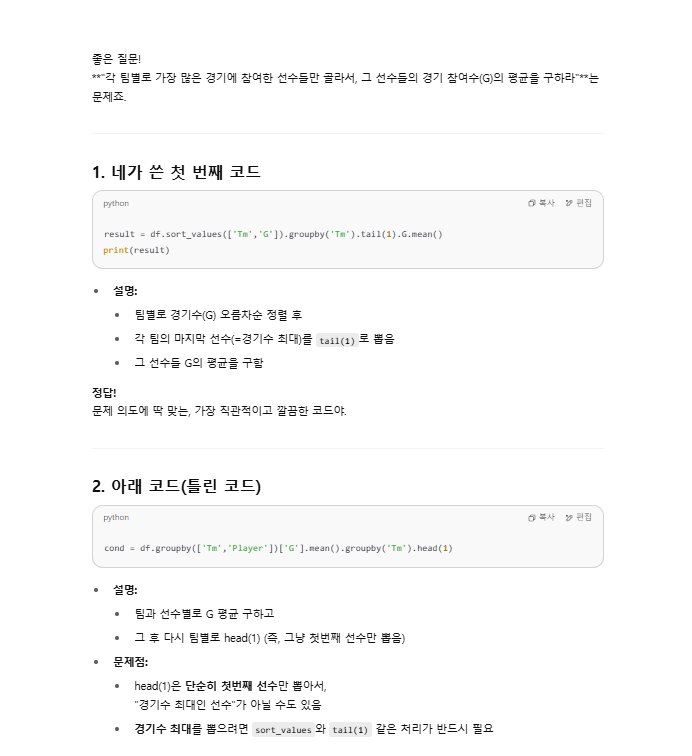

Q.110 Tm의 값이 MIA이며 Pos는 C또는 PF인 선수의 MP값의 평균은?

In [205]:
cond = df[(df['Tm'] == 'MIA') & (df['Pos'].isin(['C','PF']))]

cond['MP'].mean()



df[(df['Tm'] == 'MIA') & (df['Pos'].isin(['C', 'PF']))]['MP'].mean()


#밑에코드는 MIA로 해도 "M", "I", "A" 이렇게 포함된걸 찾음
# df[(df['Tm'].isin('MIA')) & (df['Pos'].isin('C','PF'))]

np.float64(16.7875)

Q111.전체 데이터중 G의 평균값의 1.5배 이상인 데이터들만 추출했을때 3P값의 평균은?

In [211]:
cond = df['G'].mean()
df[df['G'] >= cond *1.5]['3P'].mean()

np.float64(1.3853658536585365)

In [ ]:
Q112.Age의 평균 이상인 그룹과 평균 미만인 그룹간의 G값의 평균의 차이는?

In [219]:
평균 = df['Age'].mean()

cond1 = df[df['Age'] >= 평균]

cond2 = df[df['Age'] < 평균]

abs(cond1['G'].mean() - cond2['G'].mean())

np.float64(3.787674551781862)

Q113.평균나이가 가장 젊은 팀은 어디인가

In [222]:
df.groupby('Tm')['Age'].mean().sort_values()

,Age
Tm,
MEM,23.782609
OKC,23.807692
DET,24.111111
ORL,24.500000
HOU,24.526316
MIN,24.555556
TOR,24.869565
CHO,24.947368
POR,25.000000


Q114. Pos그룹별 평균 MP값을 구하여라

In [227]:
df.groupby('Pos')['MP'].mean()

,MP
Pos,
C,16.990000
C-PF,25.350000
PF,17.937500
PF-SF,27.300000
PG,19.547742
PG-SG,37.200000
SF,17.514557
SF-SG,20.340000
SG,18.554271
